# JPMC QR Mentorship - Case Study 1
## Khushmeet Chandi

This notebook is specific to the five-year range between January 1, 2019, to January 1, 2024. This time range can be changed. This notebook serves to provide a framework to begin analyzing stocks and take a first attempt at answering the guidance questions. 

In [157]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [158]:
!pip list | grep torch

torch                         2.2.2


In [159]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.model_selection import train_test_split

In [160]:
start_time = "2019-01-01"
end_time = "2024-01-01"

In [161]:
tickers = ["AAPL", "MSFT", "AMZN", "GOOG", "INTC", "NVDA", 
          "META", "CSCO", "TSLA", "ORCL", "IBM", "CRM", "TSM", 
          "ADBE", "QCOM", "TCEHY", "AVGO", "BABA"]

In [165]:
# Download historical stock data for each ticker symbol
complete_stock_data = {}
for symbol in tickers:
    complete_stock_data[symbol] = yf.download(symbol, start='2023-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### 1.) What was the change in price of the stock over time?

In [166]:
def change_over_time(ticker_symbols):
    for symbol in ticker_symbols:
        # Download stock data
        stock_data = complete_stock_data[symbol]
        
        # Calculate daily change in Closing price
        stock_data['Daily Change'] = stock_data['Close'].diff()
        
        # Plotting the change in Closing price over time
        plt.figure(figsize=(7, 3.5))
        plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
        plt.title(f'Change in Stock Price over Time for {symbol}')
        plt.xlabel('Date')
        plt.ylabel('Stock Price ($)')
        plt.legend()
        plt.grid(True)
        plt.show()

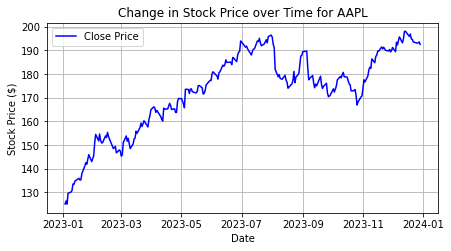

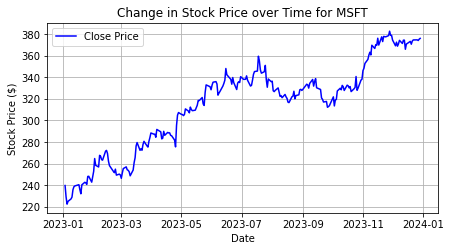

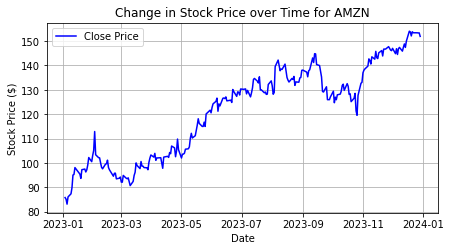

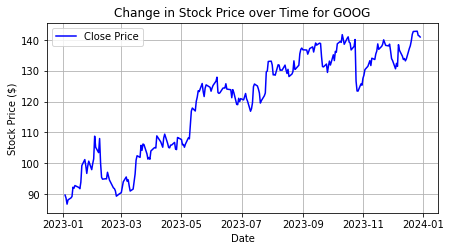

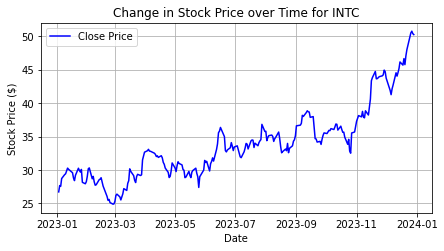

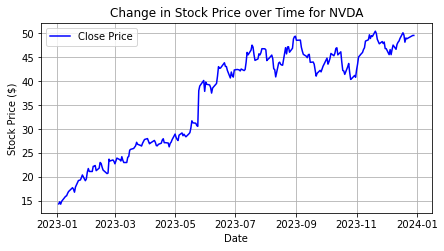

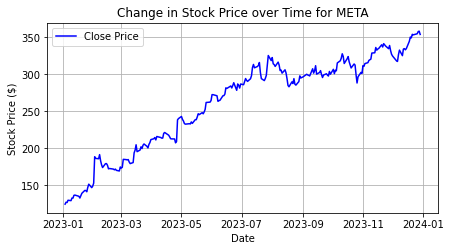

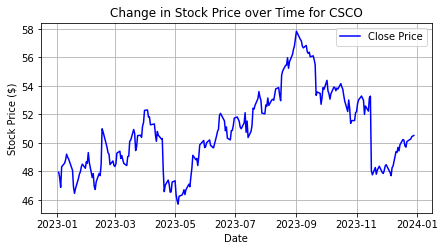

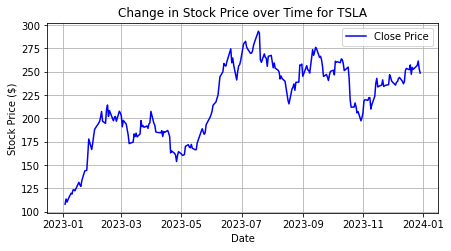

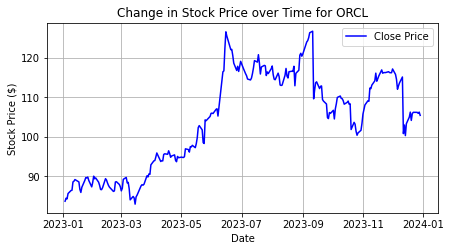

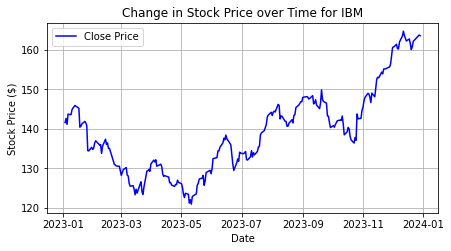

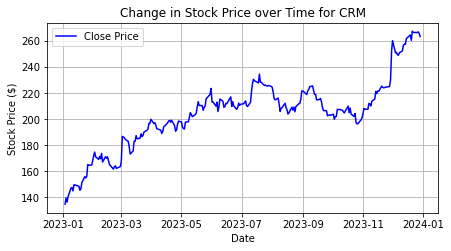

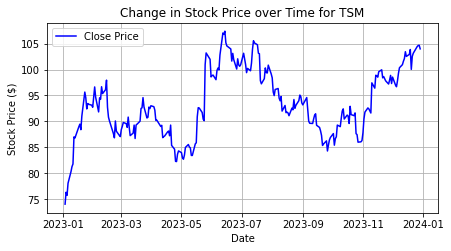

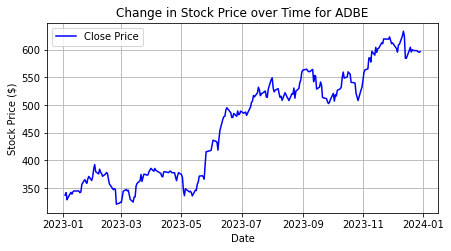

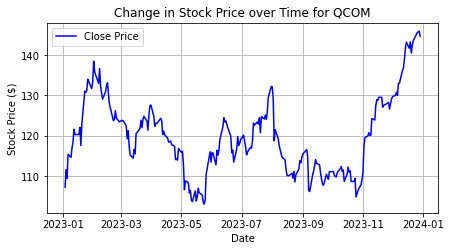

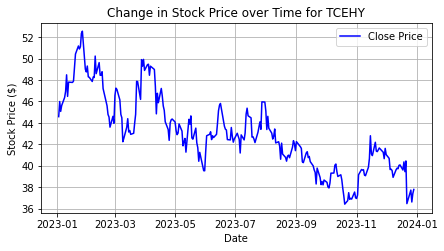

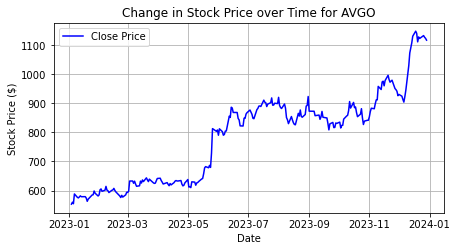

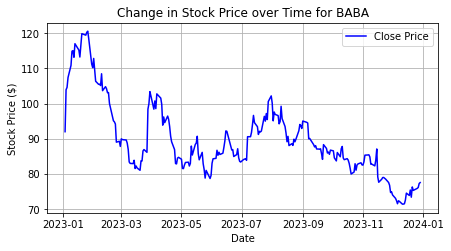

In [167]:
change_over_time(tickers)

### 2) What was the daily return of the stock on average?

In [168]:
def daily_return_on_average(ticker_symbols, start_date="2019-01-01", end_date="2024-01-01", cache_dir="stock_data_cache"):
    os.makedirs(cache_dir, exist_ok=True)
    
    for symbol in ticker_symbols:
        cache_file = os.path.join(cache_dir, f"{symbol}_{start_date}_{end_date}.csv")
        
        if os.path.exists(cache_file):
            # Read from cache if the file exists
            stock_data = pd.read_csv(cache_file, index_col=0, parse_dates=True)
        else:
            # Download and save data if cache doesn't exist
            stock_data = yf.download(symbol, start=start_date, end=end_date)
            stock_data.to_csv(cache_file)  # Save to cache file
        
        # Calculate average daily return
        stock_data['Daily Return'] = stock_data['Close'].pct_change() * 100
        average_daily_return = stock_data['Daily Return'].mean()
        
        # Plotting the average daily return distribution
        plt.figure(figsize=(5, 3))
        plt.hist(stock_data['Daily Return'].dropna(), bins=50, edgecolor='black', alpha=0.7)
        plt.title(f'Daily Returns Distribution for {symbol}')
        plt.xlabel('Daily Return (%)')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

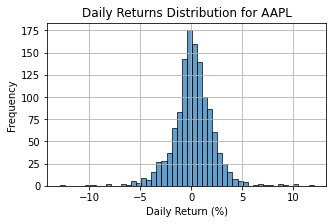

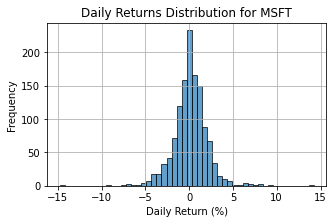

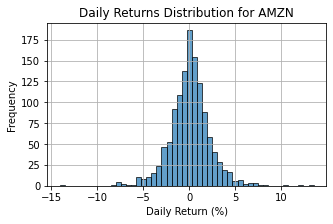

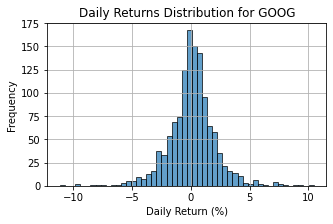

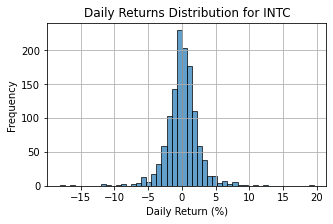

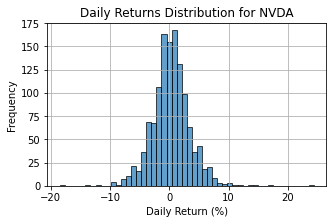

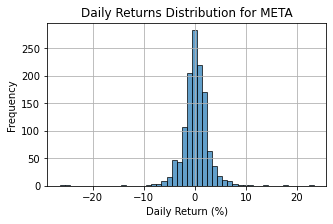

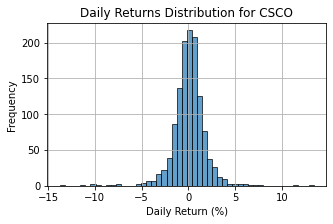

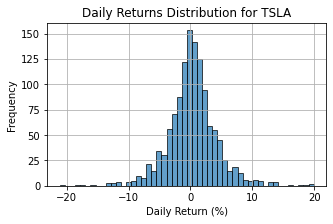

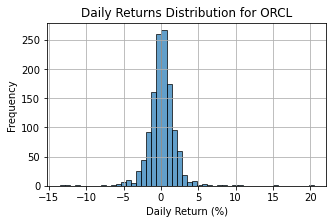

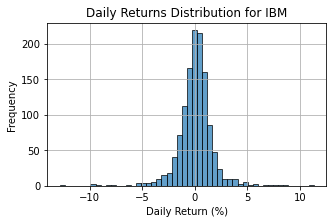

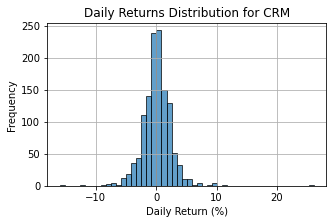

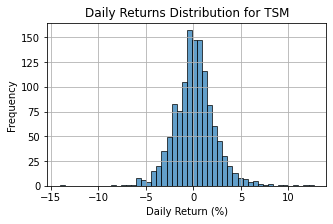

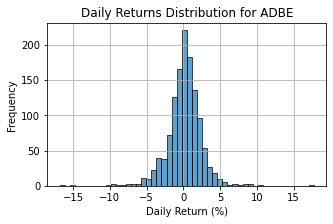

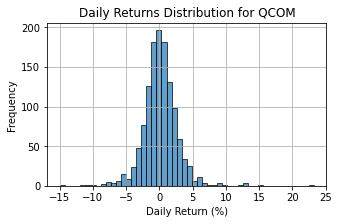

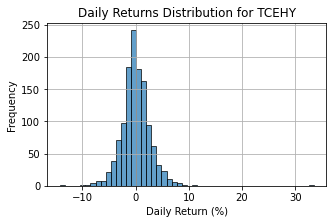

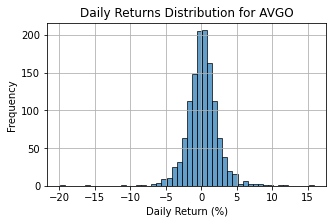

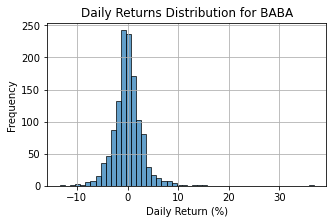

In [169]:
daily_return_on_average(tickers)

This visualization reperesents the distribution of daily returns using a histogram to understand the volatility and frequency of different return values.

### 3) What was the moving average of the various stocks?

In [170]:
def calculate_moving_averages(ticker_symbols, window = 20, start_date="2019-01-01", end_date="2024-01-01", cache_dir="stock_data_cache"):
    os.makedirs(cache_dir, exist_ok=True)
    
    for symbol in ticker_symbols:
        cache_file = os.path.join(cache_dir, f"{symbol}_{start_date}_{end_date}.csv")
        
        if os.path.exists(cache_file):
            # Read from cache if the file exists
            stock_data = pd.read_csv(cache_file, index_col=0, parse_dates=True)
        else:
            # Download and save data if cache doesn't exist
            stock_data = yf.download(symbol, start=start_date, end=end_date)
            stock_data.to_csv(cache_file)  # Save to cache file
        
        # Calculate moving averages
        key_name = 'MA_'+str(window)
        stock_data[key_name] = stock_data['Close'].rolling(window=window).mean()
        
        # Plotting
        plt.figure(figsize=(7, 3.5))
        
        # Plot Close price and moving averages
        plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
        plt.plot(stock_data.index, stock_data[key_name], label=key_name, color='red')
        
        plt.title(f'Stock Price and Moving Averages for {symbol}')
        plt.xlabel('Date')
        plt.ylabel('Stock Price ($)')
        plt.legend()
        plt.grid(True)
        plt.show()

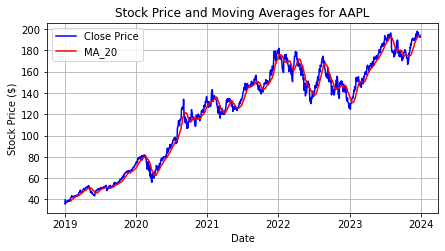

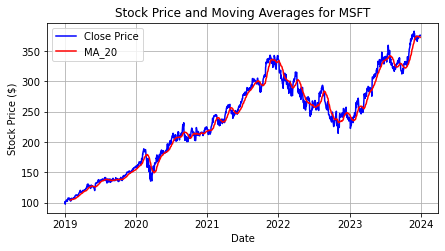

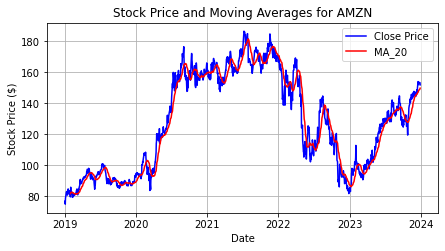

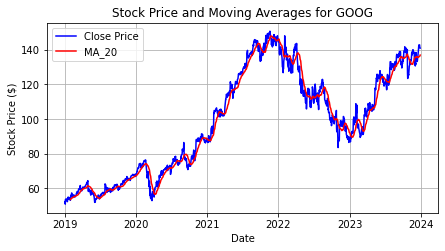

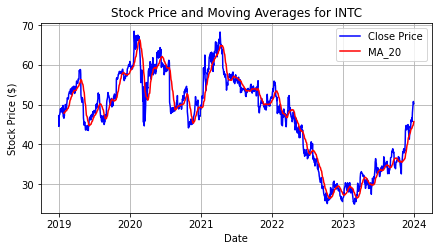

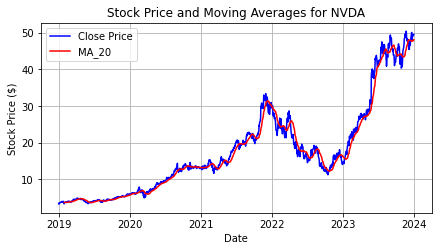

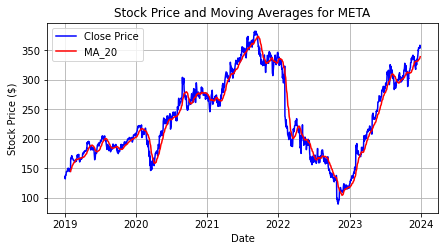

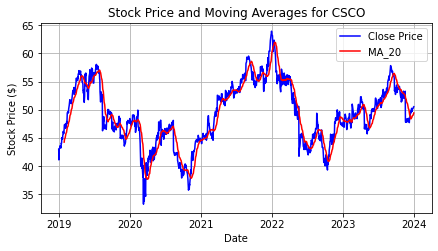

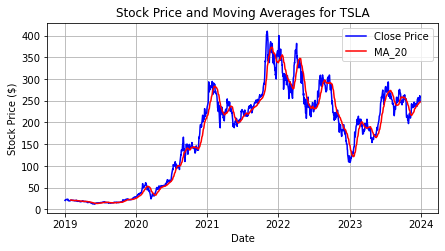

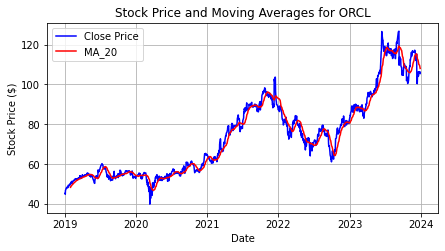

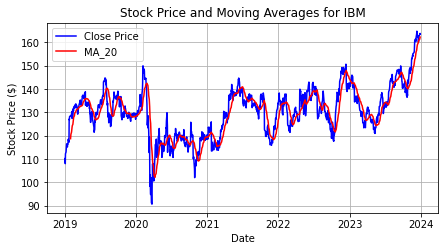

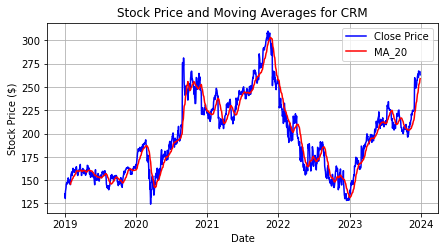

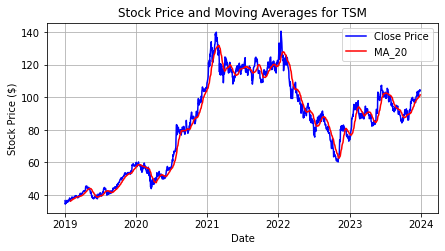

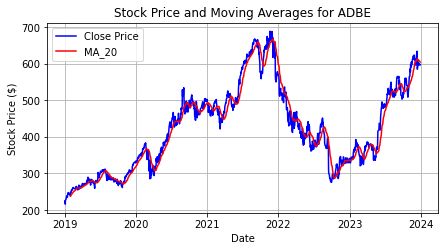

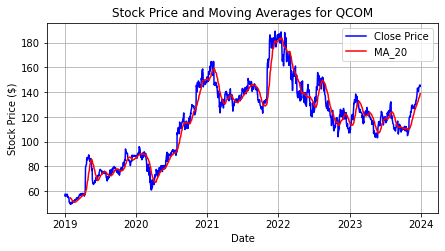

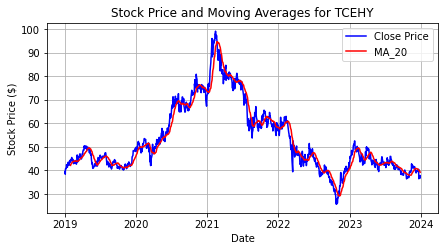

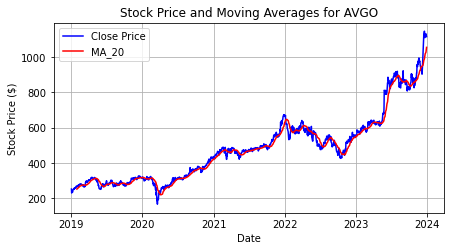

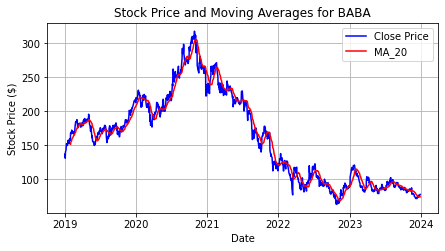

In [171]:
calculate_moving_averages(tickers, 20)

### 4) What was the correlation between different stocks?

In [177]:
df = pd.DataFrame(stock_data)

closing_complete_stock_data = {}
for symbol in tickers:
    closing_complete_stock_data[symbol] = complete_stock_data[symbol]["Close"]
    
df = pd.DataFrame(closing_complete_stock_data)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print("Correlation Matrix between different stocks:")
print(correlation_matrix)

Correlation Matrix between different stocks:
           AAPL      MSFT      AMZN      GOOG      INTC      NVDA      META  \
AAPL   1.000000  0.947791  0.881090  0.847881  0.725640  0.918985  0.927491   
MSFT   0.947791  1.000000  0.936043  0.898169  0.831229  0.935269  0.957793   
AMZN   0.881090  0.936043  1.000000  0.940624  0.869502  0.955786  0.951626   
GOOG   0.847881  0.898169  0.940624  1.000000  0.793485  0.946124  0.952210   
INTC   0.725640  0.831229  0.869502  0.793485  1.000000  0.786496  0.817323   
NVDA   0.918985  0.935269  0.955786  0.946124  0.786496  1.000000  0.977656   
META   0.927491  0.957793  0.951626  0.952210  0.817323  0.977656  1.000000   
CSCO   0.394353  0.354204  0.505562  0.585239  0.287684  0.603175  0.518496   
TSLA   0.827002  0.749795  0.793269  0.763319  0.591293  0.861583  0.823427   
ORCL   0.855136  0.822892  0.850198  0.831581  0.606760  0.899530  0.840707   
IBM    0.442222  0.573250  0.728266  0.611714  0.846297  0.604499  0.584989   
CRM    

1: Perfect positive correlation. This means the two stocks move in the same direction at all times.

0: No correlation. Changes in one stock's price have no effect on the other stock's price.

-1: Perfect negative correlation. This means the two stocks move in opposite directions at all times.

We can use correlation matrices to understand diversification benefits in a portfolio. High positive correlations suggest that stocks move together, potentially reducing diversification benefits. Negative or low correlations suggest that stocks move independently, potentially enhancing diversification benefits.

### 5) How much value do we put at risk by investing in a particular stock

To estimate how much value is at risk by investing in a particular stock, we can calculate the volatility or standard deviation of its daily returns. Volatility measures the variability of a stock's price over time and is a common metric used to assess risk in financial markets. 


In [178]:
def calculate_volatility(ticker_symbols, start_date="2019-01-01", end_date="2024-01-01", cache_dir="stock_data_cache"):
    os.makedirs(cache_dir, exist_ok=True)
    
    for symbol in ticker_symbols:
        cache_file = os.path.join(cache_dir, f"{symbol}_{start_date}_{end_date}.csv")
        
        if os.path.exists(cache_file):
            # Read from cache if the file exists
            stock_data = pd.read_csv(cache_file, index_col=0, parse_dates=True)
        else:
            # Download and save data if cache doesn't exist
            stock_data = yf.download(symbol, start=start_date, end=end_date)
            stock_data.to_csv(cache_file)  # Save to cache file
        
        # Calculate daily return and volatility
        stock_data['Daily Return'] = stock_data['Close'].pct_change() * 100
        volatility = stock_data['Daily Return'].std()
        
        # Print volatility
        print("Volatility (Risk) for {}: {:.2f}%".format(symbol, volatility * 100))

In [179]:
calculate_volatility(tickers)

Volatility (Risk) for AAPL: 203.11%
Volatility (Risk) for MSFT: 192.20%
Volatility (Risk) for AMZN: 221.87%
Volatility (Risk) for GOOG: 200.44%
Volatility (Risk) for INTC: 244.66%
Volatility (Risk) for NVDA: 326.12%
Volatility (Risk) for META: 274.84%
Volatility (Risk) for CSCO: 178.15%
Volatility (Risk) for TSLA: 407.57%
Volatility (Risk) for ORCL: 193.77%
Volatility (Risk) for IBM: 166.25%
Volatility (Risk) for CRM: 242.00%
Volatility (Risk) for TSM: 224.67%
Volatility (Risk) for ADBE: 231.95%
Volatility (Risk) for QCOM: 262.95%
Volatility (Risk) for TCEHY: 276.14%
Volatility (Risk) for AVGO: 231.81%
Volatility (Risk) for BABA: 306.16%


The volatility calculated represents the daily risk associated with the stock. Higher volatility indicates greater fluctuations in the stock price, implying higher risk. This percentage represents the standard deviation of the daily returns in percentage terms. For example, if the volatility printed is 13.25% for a stock symbol, it means that on average, the daily returns of that stock fluctuate around the mean return by approximately ±13.25%.

### 6) How can we attempt to predict future stock behavior? Specifically, how can we predict the closing price stock price using LSTM?

In [180]:
# Function to create sequences from data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

def preprocess_data(stock_data, seq_length=20):
    # Extract closing prices
    closing_prices = stock_data['Close'].values
    
    # Normalize closing prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))
    
    # Create sequences
    X, y = create_sequences(scaled_data, seq_length)
    
    # Train-test split (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Convert to PyTorch tensors
    X_train = torch.tensor(X_train).float()
    X_test = torch.tensor(X_test).float()
    y_train = torch.tensor(y_train).float()
    y_test = torch.tensor(y_test).float()
    
    return X_train, X_test, y_train, y_test, scaler

In [181]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])  # Take the output of the last time step
        return output

# Function to define and train LSTM model
def train_lstm_model(X_train, y_train, hidden_size=50, epochs=50, batch_size=32):
    input_size = X_train.shape[2]  # input_size should be 1 for 'Close' column
    output_size = y_train.shape[1]
    
    model = LSTMModel(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
#         if (epoch+1) % 10 == 0:
#             print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    
    return model

In [182]:
# Function to make predictions
def make_predictions(model, X_test, scaler):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = scaler.inverse_transform(outputs.numpy())
    return predictions

[*********************100%***********************]  1 of 1 completed


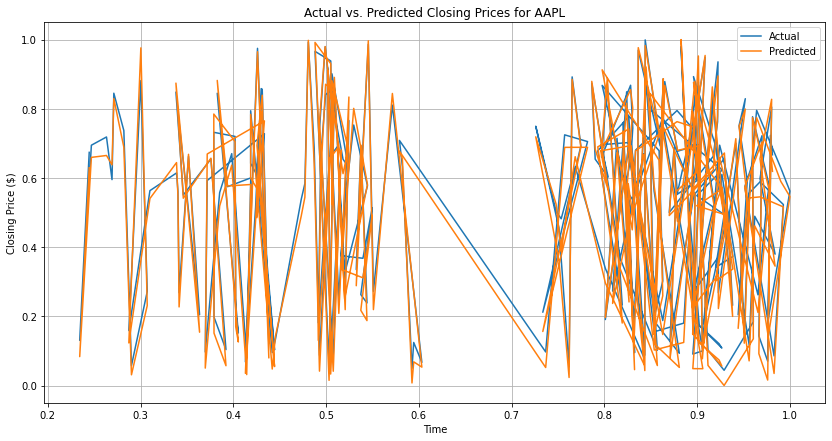

[*********************100%***********************]  1 of 1 completed


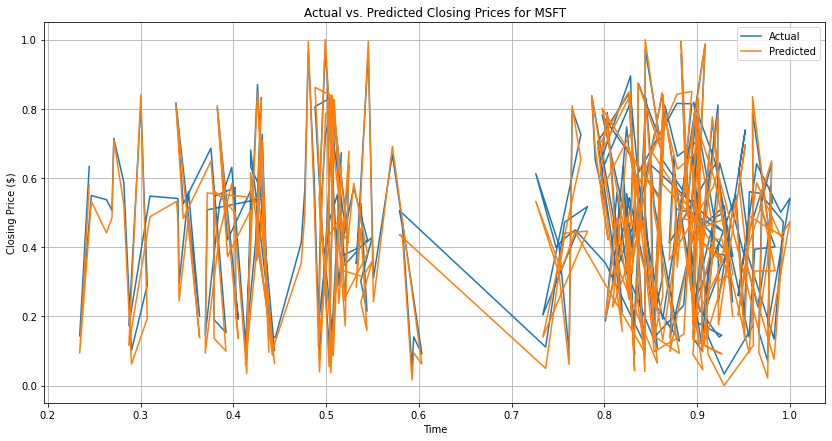

[*********************100%***********************]  1 of 1 completed


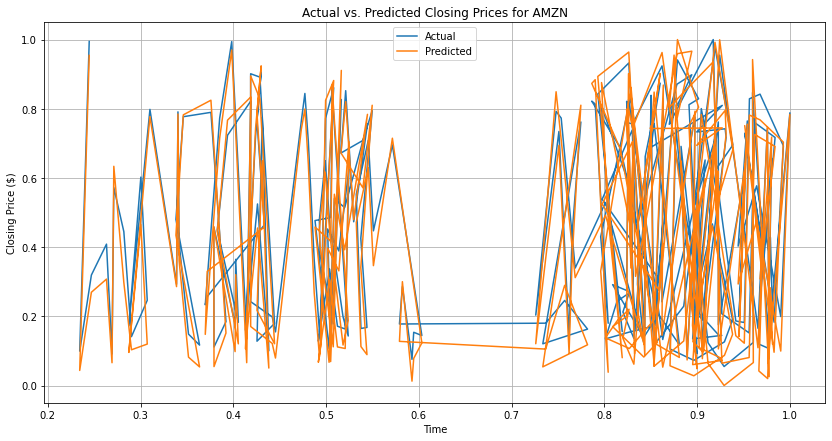

[*********************100%***********************]  1 of 1 completed


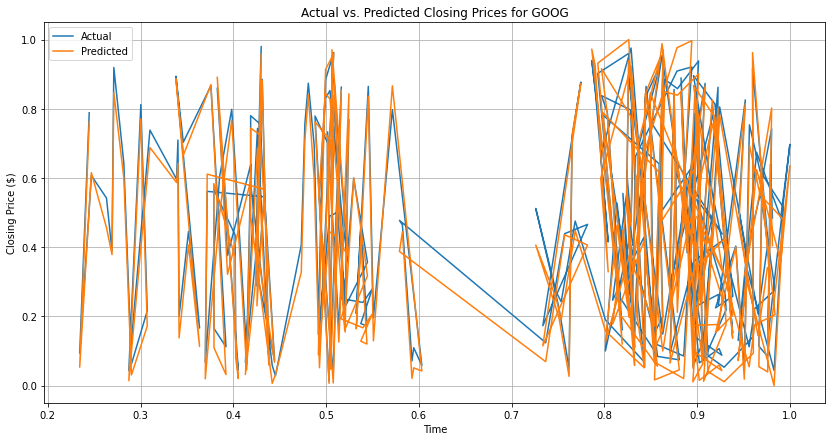

[*********************100%***********************]  1 of 1 completed


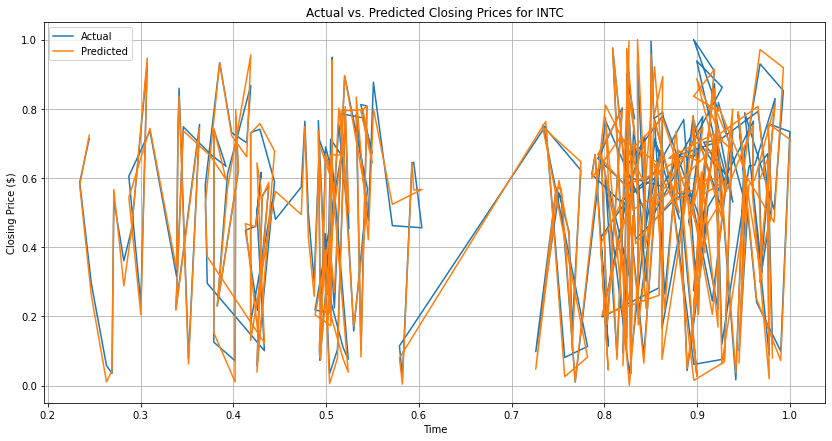

[*********************100%***********************]  1 of 1 completed


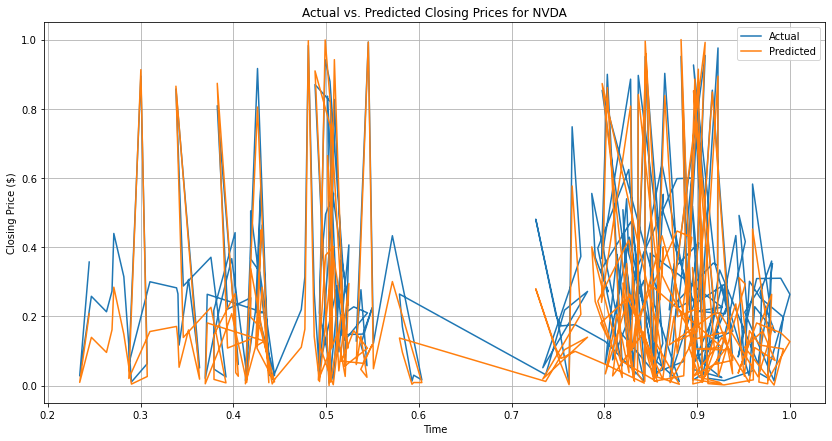

[*********************100%***********************]  1 of 1 completed


In [ ]:
for ticker in tickers:
    # Example usage: Preprocess data for training
    stock_data = yf.download(ticker, start=start_time, end=end_time)
    X_train, X_test, y_train, y_test, scaler = preprocess_data(stock_data)

    # Example usage: Train LSTM model
    lstm_model = train_lstm_model(X_train, y_train)

    # Make predictions
    predictions = make_predictions(lstm_model, X_test, scaler)

    # Normalize predictions for comparision
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_predictions = scaler.fit_transform(predictions.reshape(-1, 1))

    plt.figure(figsize=(14, 7))
    plt.plot(X_test_flat.flatten(), y_test.flatten(), label='Actual')
    plt.plot(X_test_flat.flatten(), scaled_predictions.flatten(), label='Predicted')  # Flatten predictions if necessary
    plt.title('Actual vs. Predicted Closing Prices for ' + ticker)
    plt.xlabel("Time")
    plt.ylabel('Closing Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

### 7) Suppose we have a derivative maturing in 5 trading days, with payoff function f(x) where f is some given function and x is the closing price at maturity date. How could we use/modify our model to estimate its payoff ?

Use the trained LSTM model to predict the closing price x for the maturity date, which is 5 trading days from the last available date in your historical data. To calculate the payoff, we can then use the predicted closing price x as input to the payoff function f(x) to calculate the derivative's payoff. 

### 8) How can you make Neural Network model (e.g. LSTM) more interpretable?

- We can use feature importance to determine which features have the biggest impact on predictions. 
- We can also look at how the model focuses on different parts of the input data. For example, some time periods, such as the COVID-19 pandemic, might have a different impact on the model. 
- We can experiment with changing settings, such as different parameters, to see how they effect the predictions. 
- We can perform residual analysis to pinpoint areas where the model can improve. 
- We can also take a closer at the data to pinpoint any anomalies in the time series that might be affecting the LSTM. 


To make the model interpretable for different stakeholders, we can include clear documentation and visualization tools that explain the different parts of the model, moving away from a black-box interpretation and providing clear background information. 

### Sources:
- https://www.investopedia.com/terms/v/volatility.asp
- https://aroussi.com/post/python-yahoo-finance
- https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/
- https://smartasset.com/investing/stock-correlation